In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from pandas import DataFrame, read_csv
from sklearn.model_selection import train_test_split

# Ejercicio 1
from redes import RedClassifier, RedRegressor
from espirales import generate_spirals_dataframe

# Ejercicio 5
from diagonal_paralelo import create_points_diagonal, create_points_paralelo

In [2]:
def plot_errors(ns: list[int], clfs: dict[int, RedClassifier | RedRegressor], title: str):
    clf_train_error = [clf.train_error for clf in clfs.values()]
    clf_val_error = [clf.val_error for clf in clfs.values()]
    clf_test_error = [clf.test_error for clf in clfs.values()]


    plt.plot(ns, clf_train_error, label="train", linestyle="--")
    plt.plot(ns, clf_val_error, label="validacion", linestyle="-.")
    plt.plot(ns, clf_test_error, label="test", linestyle="-")
    plt.title(f'Errores en relacion a {title}')
    plt.legend()
    plt.show()

def plot_mse(ns: list[int], clf: RedClassifier | RedRegressor, title: str):
    plt.plot(ns, clf.train_errors, label="train", linestyle="--")
    if clf.val_errors != []: plt.plot(ns, clf.val_errors, label="validacion", linestyle="-.")
    plt.plot(ns, clf.test_errors, label="test", linestyle="-")
    plt.title(f'Errores en relacion a {title}')
    plt.legend()
    plt.show()

def plot_error(ns: list[int], error: list[float], label: str, title: str):
    plt.plot(ns, error, label=label, linestyle="--")
    plt.title(f'Errores en relacion a {title}')
    plt.legend()
    plt.show()

def plot_errors_compare(ns: list[int], error_train1: list[float], error_test1: list[float],
                        error_train2: list[float], error_test2: list[float], names: list[str]):
    plt.plot(ns, error_train1, 'cyan', label=f"{names[0]} train", linestyle="--")
    plt.plot(ns, error_test1, 'cyan', label=f"{names[0]} test", linestyle="-")
    plt.plot(ns, error_train2, 'magenta', label=f"{names[1]} train", linestyle="--")
    plt.plot(ns, error_test2, 'magenta', label=f"{names[1]} test", linestyle="-")
    plt.show()

# Ejercicio 1

/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maxi

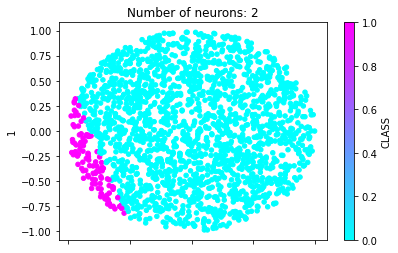

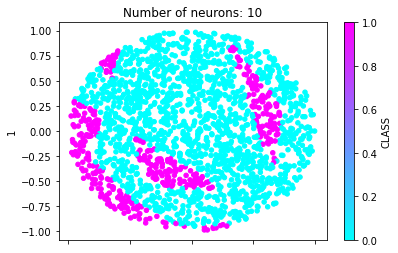

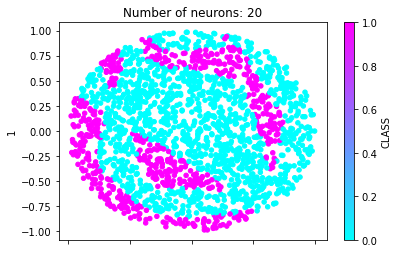

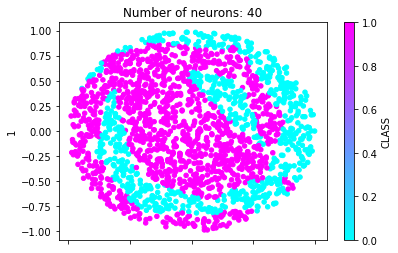

In [16]:
n_neurons = [2, 10, 20, 40]
ej1_df_data = generate_spirals_dataframe(600, 1)
ej1_df_test = generate_spirals_dataframe(2000, 1)

_x_train, _x_val, _y_train, _y_val = train_test_split(ej1_df_data.loc[:, [0, 1]],
                                                      ej1_df_data.loc[:, 'CLASS'],
                                                      test_size=.2,
                                                      random_state=0)

ej1_clfs: dict[int, RedClassifier] = {}

for n in n_neurons:
    cls = RedClassifier(N2=n, eta=0.1, alpha=0.9, time4training=20, eval_times=1000)
    cls.train(_x_train, _x_val, _y_train, _y_val)
    df_test = cls.predict(df_test=ej1_df_test.copy())
    df_test.plot(x=0, y=1, kind='scatter', c='CLASS', colormap='cool', title=f'Number of neurons: {n}')
    ej1_clfs[n] = cls
    cls.save(f'ejercicio-1/red-{n}.pkl')
    

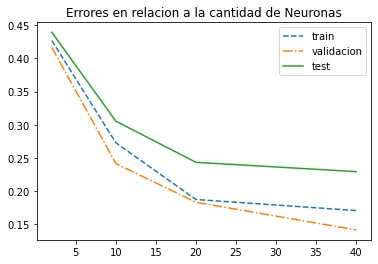

In [17]:
plot_errors(n_neurons, ej1_clfs, 'la cantidad de Neuronas')

# Ejercicio 2

In [5]:
alpha_vals = [0, 0.5, 0.9]
eta_vals = [0.1, 0.01, 0.001]
permutations = [(alpha, eta) for alpha in alpha_vals for eta in eta_vals]


ej2_df_data = read_csv('dos_elipses/dos_elipses.data', names=[0, 1, 'CLASS'])
ej2_df_data = ej2_df_data.sample(500)
ej2_df_test = read_csv('dos_elipses/dos_elipses.test', names=[0, 1, 'CLASS'])

_x_train, _x_val, _y_train, _y_val = train_test_split(ej2_df_data.loc[:, [0, 1]],
                                                      ej2_df_data.loc[:, 'CLASS'],
                                                      test_size=.2,
                                                      random_state=0)

ej2_clfs: dict[str, RedClassifier] = {'best': None, 'tmp': None}
ej2_test_errors = []

for alpha, eta in permutations:
    _train_errors = 0
    _val_errors = 0
    _test_errors = 0
    tmp: RedClassifier = None
    
    for _ in range(10):
        cls = RedClassifier(N2=6, eta=eta, alpha=alpha, time4training=50, eval_times=300)
        cls.train_val_predict(_x_train, _x_val, _y_train, _y_val, ej2_df_test.copy())
        _train_errors += cls.train_error
        _val_errors += cls.val_error
        _test_errors += cls.test_error

        if not tmp or cls.test_error < tmp.test_error:
            tmp = cls
    
    ej2_clfs[f'{alpha}-{eta}'] = tmp

    if not ej2_clfs['best'] or ej2_clfs[f'{alpha}-{eta}'].test_error < ej2_clfs['best'].test_error:
        ej2_clfs['best'] = ej2_clfs[f'{alpha}-{eta}']

    ej2_test_errors.append(_test_errors/10)

ej2_clfs['best'].save('ejercicio-2/red-best.pkl')

ej2_info = DataFrame({'Alpha': [alpha for alpha, _ in permutations],
                      'Eta': [eta for _, eta in permutations],
                      'Test Error': ej2_test_errors})
ej2_info


/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maxi

,Alpha,Eta,Test Error
0,0.0,0.100,0.08705
1,0.0,0.010,0.23525
2,0.0,0.001,0.24350
3,0.5,0.100,0.06425
4,0.5,0.010,0.21710
5,0.5,0.001,0.24350
6,0.9,0.100,0.07910
7,0.9,0.010,0.09780
8,0.9,0.001,0.23930


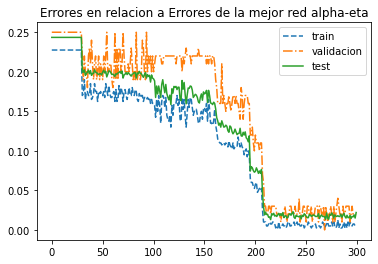

In [6]:
plot_mse(range(300), ej2_clfs['best'], 'Errores de la mejor red alpha-eta')

# Ejercicio 3

/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


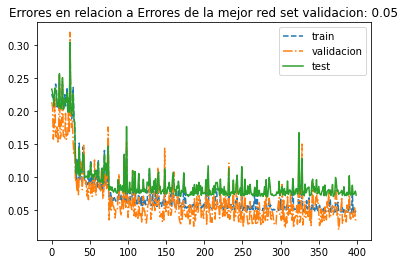

/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


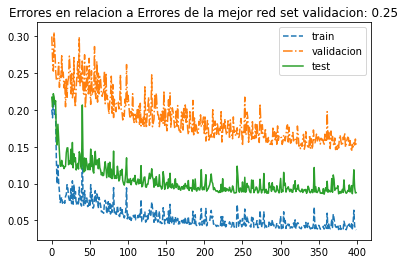

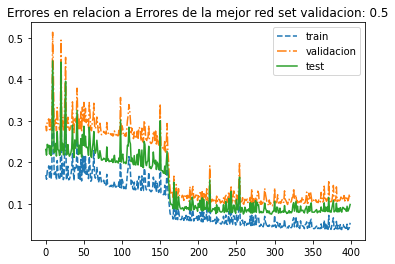

In [7]:
val_percentages = [.05, .25, .5]

ej3_df_data = read_csv('ikeda/ikeda.data', names=[0,1,2,3,4,'CLASS'], delim_whitespace=True)
ej3_df_test = read_csv('ikeda/ikeda.test', names=[0,1,2,3,4,'CLASS'], delim_whitespace=True).sample(2000)

ej3_clfs: dict[float, RedRegressor] = {}

for val in val_percentages:
    _x_train, _x_val, _y_train, _y_val = train_test_split(ej3_df_data.loc[:, range(5)],
                                                          ej3_df_data.loc[:, 'CLASS'],
                                                          test_size=val,
                                                          random_state=0)
    clf = RedRegressor(N2=30, eta=.01, alpha=.9, time4training=50, eval_times=400)
    clf.train_val_predict(_x_train, _x_val, _y_train, _y_val, ej3_df_test.copy())
    ej3_clfs[val] = clf
    clf.save(f'ejercicio-3/red-{val}.pkl')
    plot_mse(range(400), clf, f'Errores de la mejor red set validacion: {val}')

# Ejercicio 4

/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bautistamarelli/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maxi

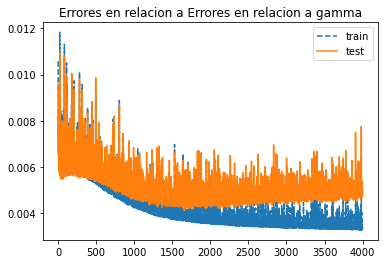

In [8]:
gammas = [10**(-(i+1)) for i in range(6)]

_names = list(range(12))+['CLASS']
ej4_df_data = read_csv('ssp/ssp.data', names=_names)
ej4_df_test = read_csv('ssp/ssp.test', names=_names)

_x_train, _y_train = ej4_df_data.loc[:, range(12)], ej4_df_data.loc[:, 'CLASS']

ej4_clfs: dict[str, RedRegressor] = {'best': None}

for gamma in gammas:
    clf = RedRegressor(N2=6, eta=.05, alpha=.3, time4training=20, eval_times=4000, gamma=gamma)
    clf.train_predict(_x_train, _y_train, ej4_df_test.copy())
    if not ej4_clfs['best'] or clf.test_error < ej4_clfs['best'].test_error:
        ej4_clfs['best'] = clf
    ej4_clfs[f'{val}'] = clf

plot_mse(range(4000), ej4_clfs['best'], 'Errores en relacion a gamma')

# Ejercicio 5

In [9]:
# d_vals = [2, 4, 8, 16, 32]

# ej5_diag_clfs: dict[str, RedClassifier] = {'best': None}
# ej5_paral_clfs: dict[str, RedClassifier] = {'best': None}
# ej5_diag_train_errors = []
# ej5_diag_test_errors = []
# ej5_paral_train_errors = []
# ej5_paral_test_errors = []

# for d in d_vals:
#     df_test = create_points_diagonal(d, 10000, .78)
#     tmp: RedClassifier
#     _train_errors = 0
#     _test_errors = 0

#     for i in range(20):
#         df_data = create_points_diagonal(d, 250, .78)
#         clf = RedClassifier(N2=6, eta=.1, alpha=.5, time4training=50, eval_times=300, gamma=(10**-5))
#         clf.train_predict(df_data.loc[:, range(d)], df_data.loc[:, 'CLASS'], df_test)
#         _train_errors += clf.train_error
#         _test_errors += clf.test_error

#         if not tmp or clf.test_error < tmp.test_error:
#             tmp = clf
    
#     ej5_diag_clfs[f'{d}'] = tmp
#     ej5_diag_train_errors.append(_train_errors/20)
#     ej5_diag_test_errors.append(_test_errors/20)
#     tmp.save(f'ejercicio-5/red-diag-{d}.pkl')
    
#     if not ej5_diag_clfs['best'] or tmp.test_error < ej5_diag_clfs['best'].test_error:
#         ej5_diag_clfs['best'] = tmp
    

# for d in d_vals:
#     df_test = create_points_paralelo(d, 10000, .78)
#     tmp: RedClassifier
#     _train_errors = 0
#     _test_errors = 0

#     for i in range(20):
#         df_data = create_points_paralelo(d, 250, .78)
#         clf = RedClassifier(N2=6, eta=.1, alpha=.5, time4training=50, eval_times=300, gamma=(10**-5))
#         clf.train_predict(df_data.loc[:, range(d)], df_data.loc[:, 'CLASS'], df_test)
#         _train_errors += clf.train_error
#         _test_errors += clf.test_error

#         if not tmp or clf.test_error < tmp.test_error:
#             tmp = clf
    
#     ej5_paral_clfs[f'{d}'] = tmp
#     ej5_paral_train_errors.append(_train_errors/20)
#     ej5_paral_test_errors.append(_test_errors/20)
#     tmp.save(f'ejercicio-5/red-paral-{d}.pkl')

#     if not ej5_paral_clfs['best'] or tmp.test_error < ej5_paral_clfs['best'].test_error:
#         ej5_paral_clfs['best'] = tmp

# plot_errors_compare(d_vals, ej5_diag_train_errors, ej5_diag_test_errors, ej5_paral_train_errors, ej5_paral_test_errors)